In [1]:
import xarray as xr
import cftime # type: ignore
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
from datetime import datetime
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
from metpy.plots import SkewT, Hodograph
from siphon.simplewebservice.wyoming import WyomingUpperAir

# CAPE (CONVECTIVE AVAILABLE POTENTIAL ENERGY)

# OPENING DATASET

In [2]:
ds = xr.open_dataset('combined.nc')
ds

<xarray.Dataset>
Dimensions:    (longitude: 21, latitude: 33, time: 26304)
Coordinates:
  * longitude  (longitude) float32 -3.5 -3.25 -3.0 -2.75 ... 0.75 1.0 1.25 1.5
  * latitude   (latitude) float32 12.0 11.75 11.5 11.25 ... 4.75 4.5 4.25 4.0
  * time       (time) datetime64[ns] 2000-01-01 ... 2018-12-31T23:00:00
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    d2m        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    cape       (time, latitude, longitude) float32 ...
    cin        (time, latitude, longitude) float32 ...
    z          (time, latitude, longitude) float32 ...
    tcw        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-06-11 16:52:35 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

# SELECTING ACCRA

In [3]:
ds = ds.sel(latitude=5.6, longitude=0.17, method='nearest')
ds = ds.where(ds['time.year']==2015, drop=True)


# CONVERTING FROM METERS TO MILLIMETERS

In [4]:
ds['tp'] = ds['tp']*1000
pre = ds['tp']
pre

<xarray.DataArray 'tp' (time: 8760)>
array([-1.8626451e-06, -1.8626451e-06, -1.8626451e-06, ...,
       -1.8626451e-06, -1.8626451e-06, -1.8626451e-06], dtype=float32)
Coordinates:
    longitude  float32 0.25
    latitude   float32 5.5
  * time       (time) datetime64[ns] 2015-01-01 ... 2015-12-31T23:00:00

# RESAMPLING TO DAILY

In [5]:
pre_daily = ds['tp'].resample(time='1D').sum("time")#.mean()
#pre_half_daily = pre.resample(time='12H').mean()
pre_daily


<xarray.DataArray 'tp' (time: 365)>
array([-4.47034836e-05, -4.47034836e-05,  3.58354300e-02,  1.48149207e-01,
        1.51619315e-03, -4.47034836e-05, -4.47034836e-05, -4.47034836e-05,
       -4.47034836e-05, -4.47034836e-05, -4.47034836e-05, -4.47034836e-05,
       -4.47034836e-05, -4.47034836e-05, -4.47034836e-05, -4.47034836e-05,
        4.20752913e-02,  7.79591501e-02,  2.13151798e-01,  3.18184495e-01,
        5.21490335e-01,  1.25275925e-01,  1.46588311e-01,  9.33304429e-01,
        1.34147704e+00,  1.48965979e+00,  5.29997051e-02,  3.92533839e-01,
        4.39332783e-01,  3.88376415e-01,  1.07473326e+00,  3.04143876e-01,
        2.37593427e-01,  7.35193491e-01,  1.16832566e+00,  4.09696251e-01,
        4.02422637e-01,  1.16468406e+00,  1.24756247e-01,  4.05535102e-01,
        3.42624247e-01,  3.95663083e-01,  7.33118534e-01,  4.36218470e-01,
        1.23280096e+00,  1.08513045e+00,  4.90812600e-01,  1.89235434e-01,
        7.04964066e+00,  4.90010786e+00,  1.18132687e+00,  4.38299030e-01,
        8.79359150e+00,  5.37090003e-01,  2.05868855e-01,  1.00309029e-01,
        7.84769654e-02,  1.63213348e+00,  3.24424356e-01,  9.31881368e-03,
        1.32031739e-01,  1.19036064e-01,  1.62432897e+00,  1.08635053e-01,
        3.75378877e-01,  3.86817396e-01,  8.83545727e-02,  4.33092952e-01,
        1.57025456e+00,  1.41478717e+00,  2.49031931e-01,  1.66229343e+00,
        3.07265669e-01,  1.99455214e+00,  1.23279548e+00,  1.87963247e+00,
        3.01835203e+00,  1.21634454e-01,  3.85776162e-01,  2.75993919e+00,
...
        6.47321343e-01,  7.83033669e-01,  1.12725234e+00,  1.03001857e+00,
        3.96833396e+00,  9.62189674e+00,  7.91589642e+00,  1.33367634e+00,
        3.74866635e-01,  1.73456597e+00,  1.73633918e-01,  4.39340234e-01,
        3.48996568e+00,  5.53728998e-01,  2.24516535e+00,  1.29600658e+01,
        7.87378216e+00,  5.96364975e-01,  7.48410821e-02,  1.70521438e-01,
        2.83349305e-01,  2.95544028e+00,  3.11298823e+00,  1.07629597e+00,
        4.11756325e+00,  5.79211891e-01,  3.65583587e+00,  2.24072486e-01,
        2.79184431e-01,  1.10592508e+00,  8.36065054e-01,  5.76084495e-01,
        1.05393302e+00,  1.05520710e-01,  5.31371713e-01,  1.26313418e-01,
        4.25815582e-01,  3.09342504e-01,  1.44078588e+00,  2.91666031e-01,
        3.82142127e-01,  1.63993418e+00,  1.19952679e+00,  8.69868338e-01,
        3.51455063e-01,  3.86295855e-01,  2.68269330e-01,  1.52918315e+00,
        3.30485201e+00,  2.43950635e-02, -4.47034836e-05, -4.47034836e-05,
       -4.47034836e-05,  4.74974513e-04,  2.55554914e-03, -4.47034836e-05,
       -4.47034836e-05,  2.55741179e-03,  1.67392194e-01,  9.92752612e-02,
       -4.47034836e-05,  2.33557075e-02, -4.47034836e-05, -4.47034836e-05,
       -4.47034836e-05, -4.47034836e-05, -4.47034836e-05, -4.47034836e-05,
       -4.47034836e-05, -4.47034836e-05, -4.47034836e-05, -4.47034836e-05,
       -4.47034836e-05, -4.47034836e-05, -4.47034836e-05,  1.55568123e-02,
        7.32764602e-02], dtype=float32)
Coordinates:
    longitude  float32 0.25
    latitude   float32 5.5
  * time       (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2015-12-31

In [6]:
pre_daily.to_dataframe(name=None, dim_order=None)

,longitude,latitude,tp
time,,,
2015-01-01,0.25,5.5,-0.000045
2015-01-02,0.25,5.5,-0.000045
2015-01-03,0.25,5.5,0.035835
2015-01-04,0.25,5.5,0.148149
2015-01-05,0.25,5.5,0.001516
...,...,...,...
2015-12-27,0.25,5.5,-0.000045
2015-12-28,0.25,5.5,-0.000045
2015-12-29,0.25,5.5,-0.000045


# VISUALIZAION OF THE DAILY PRECIPITATION FOR ACCRA

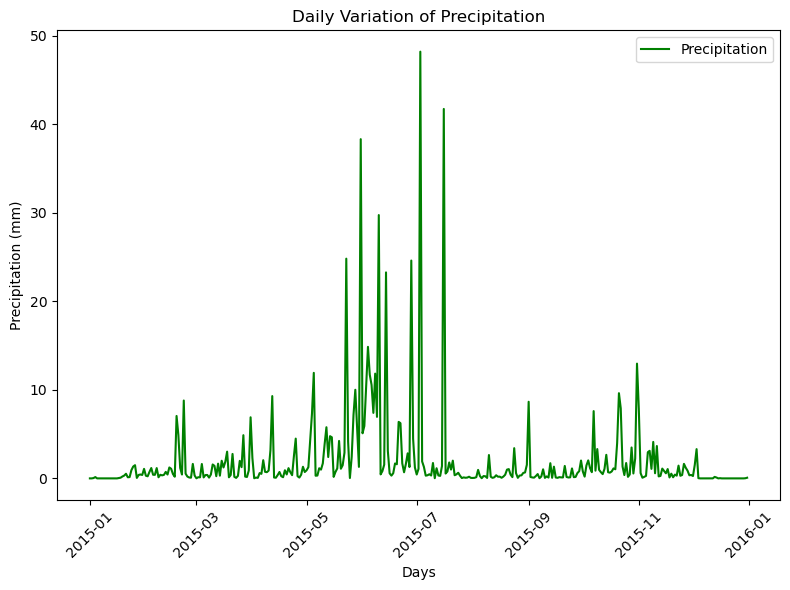

In [7]:
plt.figure(figsize=(8, 6))
plt.plot(pre_daily.time,pre_daily, color='green', label='Precipitation')
plt.xlabel('Days')
plt.ylabel('Precipitation (mm)')
plt.title('Daily Variation of Precipitation')
plt.legend()
plt.grid(False)
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

# USING THE 95 QUANTILE TO FIND THE HIGH IMPACT RAINFALL EVENTS

In [8]:
pre_daily_thres = pre_daily.quantile(0.95)
pre_daily_impact = pre_daily[pre_daily >= pre_daily_thres]

In [9]:
pre_daily_thres

<xarray.DataArray 'tp' ()>
array(8.50532742)
Coordinates:
    quantile  float64 0.95

# VISUALIZATION OF THE 2015 PRECIPITATION FOR ACCRA WITH HIGH IMPACT RAINFALL EVENTS

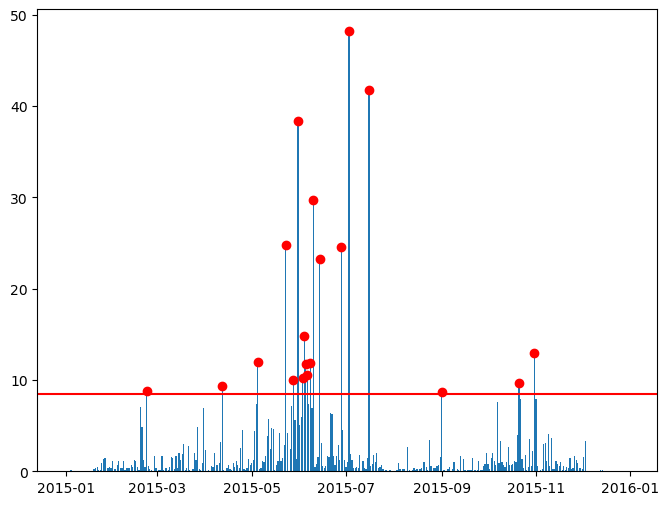

In [10]:
plt.figure(figsize=(8,6))

plt.bar(pre_daily['time'], pre_daily, label='Dailly Precipitation')
plt.scatter(pre_daily_impact['time'], pre_daily_impact, color='red', label='high_impact_days')
plt.axhline(pre_daily_thres, color='r')

plt.show()

In [11]:
print(pre_daily_impact.time)

<xarray.DataArray 'time' (time: 19)>
array(['2015-02-22T00:00:00.000000000', '2015-04-12T00:00:00.000000000',
       '2015-05-05T00:00:00.000000000', '2015-05-23T00:00:00.000000000',
       '2015-05-28T00:00:00.000000000', '2015-05-31T00:00:00.000000000',
       '2015-06-03T00:00:00.000000000', '2015-06-04T00:00:00.000000000',
       '2015-06-05T00:00:00.000000000', '2015-06-06T00:00:00.000000000',
       '2015-06-08T00:00:00.000000000', '2015-06-10T00:00:00.000000000',
       '2015-06-14T00:00:00.000000000', '2015-06-28T00:00:00.000000000',
       '2015-07-03T00:00:00.000000000', '2015-07-16T00:00:00.000000000',
       '2015-09-01T00:00:00.000000000', '2015-10-21T00:00:00.000000000',
       '2015-10-31T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
    longitude  float32 0.25
    latitude   float32 5.5
  * time       (time) datetime64[ns] 2015-02-22 2015-04-12 ... 2015-10-31
    quantile   float64 0.95


# EXTRACTION OF HIGH IMPACT RAINFALL DAYS

In [12]:
pre_ext = pre_daily_impact.where(pre_daily_impact['time.month']>=5,drop=True).where(pre_daily_impact['time.month']<=11,drop=True)

# VISUALIZATION OF EXTRACTED HIGH IMPACT RAINFALL DAYS IN 2015

In [13]:
high_impact = pre_ext.where(pre_ext>=pre_daily_thres,drop=True)
high_impact['time']

<xarray.DataArray 'time' (time: 17)>
array(['2015-05-05T00:00:00.000000000', '2015-05-23T00:00:00.000000000',
       '2015-05-28T00:00:00.000000000', '2015-05-31T00:00:00.000000000',
       '2015-06-03T00:00:00.000000000', '2015-06-04T00:00:00.000000000',
       '2015-06-05T00:00:00.000000000', '2015-06-06T00:00:00.000000000',
       '2015-06-08T00:00:00.000000000', '2015-06-10T00:00:00.000000000',
       '2015-06-14T00:00:00.000000000', '2015-06-28T00:00:00.000000000',
       '2015-07-03T00:00:00.000000000', '2015-07-16T00:00:00.000000000',
       '2015-09-01T00:00:00.000000000', '2015-10-21T00:00:00.000000000',
       '2015-10-31T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time       (time) datetime64[ns] 2015-05-05 2015-05-23 ... 2015-10-31
    longitude  float32 0.25
    latitude   float32 5.5
    quantile   float64 0.95

In [14]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Extract high impact days
# high_impact = pre_daily.where(pre_daily >= pre_daily_thres, drop=True)

# # Convert the dates to pandas datetime for easier manipulation
# dates = pd.to_datetime(high_impact['time'].values)
# values = high_impact.values

# # Plotting the high impact days
# fig, ax = plt.subplots(figsize=(16, 8))  # Increased figure size
# ax.bar(dates, values, label='Daily Precipitation')


# additional_dates = pd.to_datetime([
#     '2015-05-05', '2015-05-23', '2015-05-28', '2015-05-31',
#     '2015-06-03', '2015-06-04', '2015-06-05', '2015-06-06',
#     '2015-06-08', '2015-06-10', '2015-06-14', '2015-06-28',
#     '2015-07-03', '2015-07-16', '2015-09-01', '2015-10-21',
#     '2015-10-31'
# ])



# # Adding the threshold line
# ax.axhline(pre_daily_thres, color='r', linestyle='--', label=f'Threshold {pre_daily_thres.values:.2f} mm')

# # Set every nth date for the x-axis labels to create spacing
# n = 2  # Adjust this value to control spacing
# filtered_dates = dates[::n]
# filtered_labels = [date.strftime('%Y-%m-%d') for date in filtered_dates]

# # Manually set x-ticks and labels with increased font size
# ax.set_xticks(filtered_dates)
# ax.set_xticklabels(filtered_labels, rotation=90, ha='center', fontsize=12)  # Increased font size

# ax.legend(loc='upper right', fontsize=8)
# ax.set_xlabel("Days", fontsize=12)
# ax.set_ylabel("Precipitation (mm)", fontsize=12)
# ax.set_title("High Impact Rainfall Days", fontsize=14)
# plt.tight_layout()
# plt.grid(False)
# plt.show()

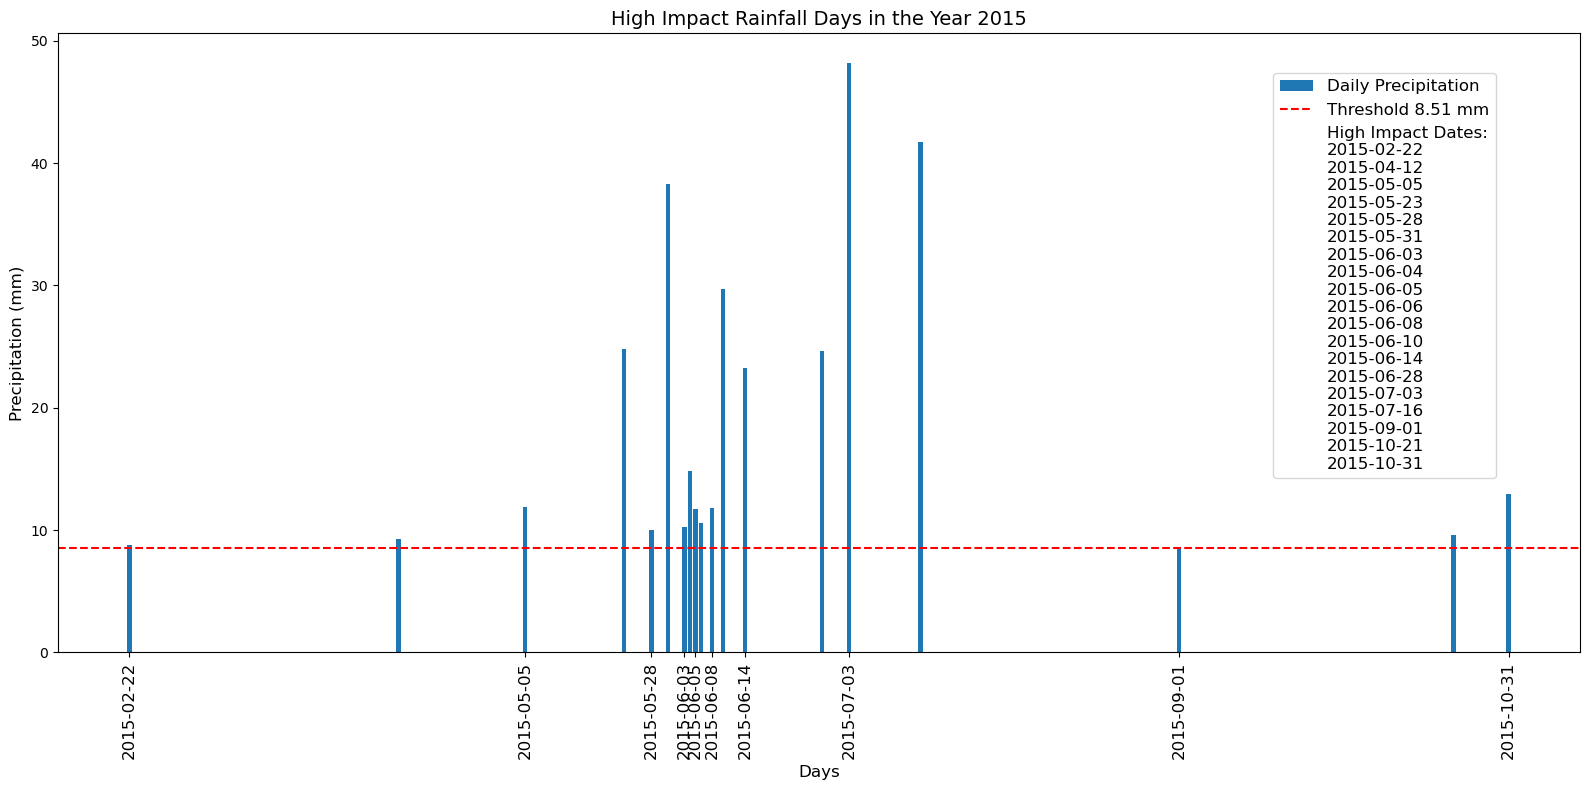

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming pre_daily and pre_daily_thres are already defined

# Extract high impact days
high_impact = pre_daily.where(pre_daily >= pre_daily_thres, drop=True)

# Convert the dates to pandas datetime for easier manipulation
dates = pd.to_datetime(high_impact['time'].values)
values = high_impact.values

# Additional dates to be labeled
additional_dates = [
    '2015-02-22', '2015-04-12', '2015-05-05', '2015-05-23', 
    '2015-05-28', '2015-05-31','2015-06-03', '2015-06-04', 
    '2015-06-05', '2015-06-06','2015-06-08', '2015-06-10', 
    '2015-06-14', '2015-06-28','2015-07-03', '2015-07-16', 
    '2015-09-01', '2015-10-21','2015-10-31'
]

# Plotting the high impact days
fig, ax = plt.subplots(figsize=(16, 8))
bars = ax.bar(dates, values, label='Daily Precipitation')

# Adding the threshold line
threshold_line = ax.axhline(pre_daily_thres, color='r', linestyle='--', label=f'Threshold {pre_daily_thres.values:.2f} mm')

n = 2  # Adjust this value to control spacing
filtered_dates = dates[::n]
filtered_labels = [date.strftime('%Y-%m-%d') for date in filtered_dates]

# Manually set x-ticks and labels with increased font size
ax.set_xticks(filtered_dates)
ax.set_xticklabels(filtered_labels, rotation=90, ha='center', fontsize=12)  # Increased font size

# Custom legend entry for the additional dates
additional_dates_label = '\n'.join(additional_dates)
custom_legend = plt.Line2D([0], [0], color='w', marker='o', linestyle='None', markersize=0, label=f'High Impact Dates:\n{additional_dates_label}')

# Adding all elements to the legend
ax.legend(handles=[bars, threshold_line, custom_legend], bbox_to_anchor=[0.95,0.95], loc='upper right', fontsize=12)

ax.set_xlabel("Days", fontsize=12)
ax.set_ylabel("Precipitation (mm)", fontsize=12)
ax.set_title("High Impact Rainfall Days in the Year 2015", fontsize=14)
plt.tight_layout()
plt.grid(False)
plt.show()
#plt.savefig("high-impact-rainfall.svg", bbox_inches='tight', dpi=1200)

In [16]:
ds_day_before = ds.sel(time='2015-07-02')
ds_day_during = ds.sel(time='2015-07-03')
ds_day_end = ds.sel(time='2015-07-04')

ds_day_cape_before = ds_day_before['cape'].resample(time='1H').sum("time")
ds_day_cape_during = ds_day_during['cape'].resample(time='1H').sum("time")
ds_day_cape_end = ds_day_end['cape'].resample(time='1H').sum("time")




In [17]:
ds_day_dew_before = ds_day_before['d2m'].resample(time='1H').sum('time')
ds_day_dew_before-273.15

<xarray.DataArray 'd2m' (time: 24)>
array([23.40915 , 23.34903 , 23.02069 , 22.92807 , 22.298248, 22.512787,
       22.707825, 22.73059 , 22.80777 , 22.900421, 23.116608, 23.24826 ,
       23.360413, 23.345764, 23.276703, 23.177551, 23.169434, 23.033722,
       23.03778 , 23.127167, 23.107666, 23.118225, 23.478241, 23.4888  ],
      dtype=float32)
Coordinates:
    longitude  float32 0.25
    latitude   float32 5.5
  * time       (time) datetime64[ns] 2015-07-02 ... 2015-07-02T23:00:00

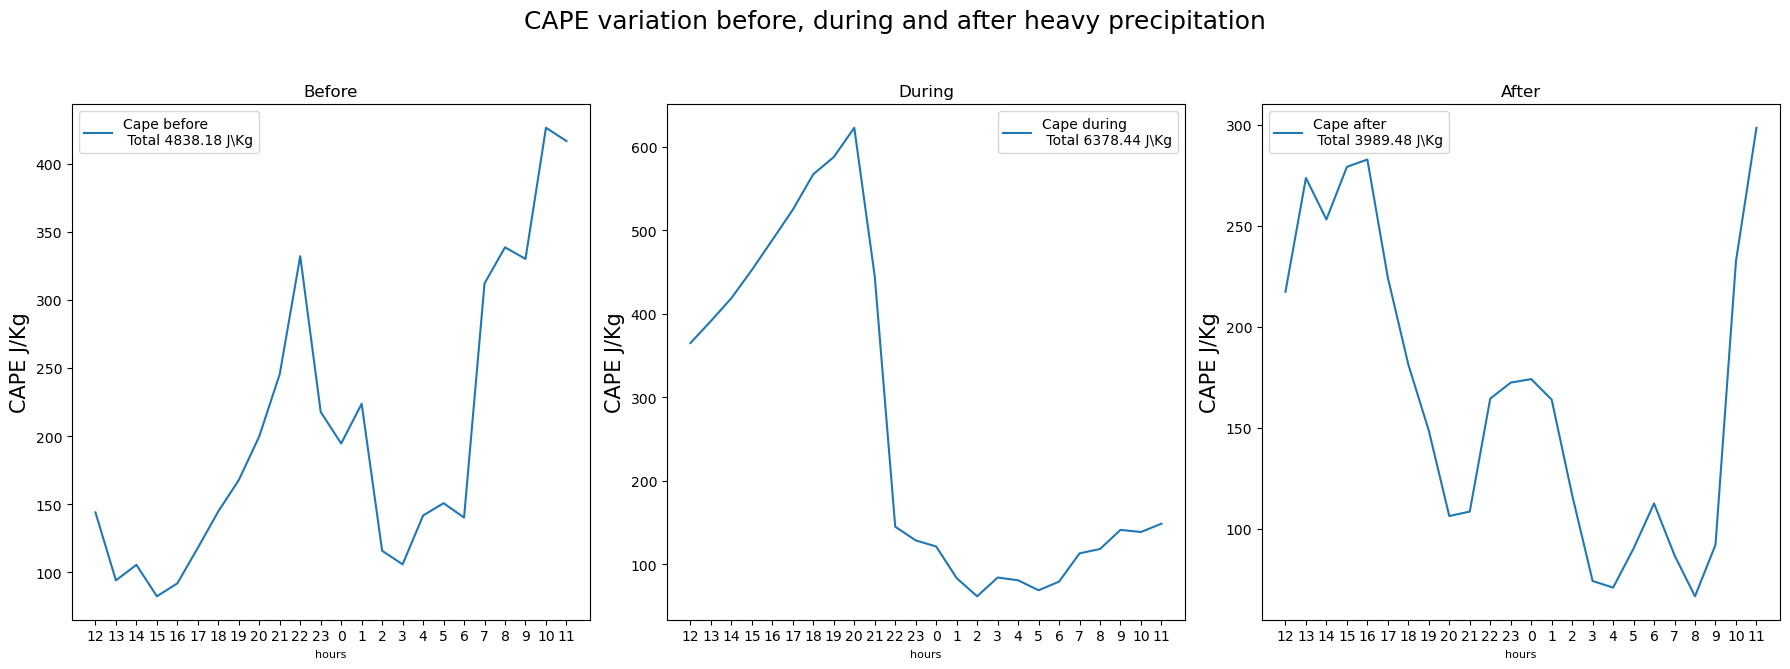

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(18, 7))
hours = 'hours'

# Assuming the data has 24 points representing each hour of the day
hour_labels = [str((i + 12) % 24) for i in range(24)]
cape = 'CAPE J/Kg'

# Plot for "Before"
ax[0].plot(ds_day_cape_before, label=f'Cape before \n Total {ds_day_cape_before.sum().values:.2f} J\Kg')
ax[0].set_xlabel(hours, fontsize=8)
ax[0].set_ylabel(cape, fontsize=15)
ax[0].set_title('Before')
ax[0].legend()
ax[0].set_xticks(range(24))
ax[0].set_xticklabels(hour_labels)

# Plot for "During"
ax[1].plot(ds_day_cape_during, label=f'Cape during \n Total {ds_day_cape_during.sum().values:.2f} J\Kg')
ax[1].set_xlabel(hours, fontsize=8)
ax[1].set_ylabel(cape, fontsize=15)
ax[1].set_title('During')
ax[1].legend()
ax[1].set_xticks(range(24))
ax[1].set_xticklabels(hour_labels)

# Plot for "After"
ax[2].plot(ds_day_cape_end, label=f'Cape after \n Total {ds_day_cape_end.sum().values:.2f} J\Kg')
ax[2].set_xlabel(hours, fontsize=8)
ax[2].set_ylabel(cape, fontsize=15)
ax[2].set_title('After')
ax[2].legend()
ax[2].set_xticks(range(24))
ax[2].set_xticklabels(hour_labels)

plt.suptitle('CAPE variation before, during and after heavy precipitation', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
plt.show()
#plt.savefig("CAPE.svg", bbox_inches="tight", dpi=1200)

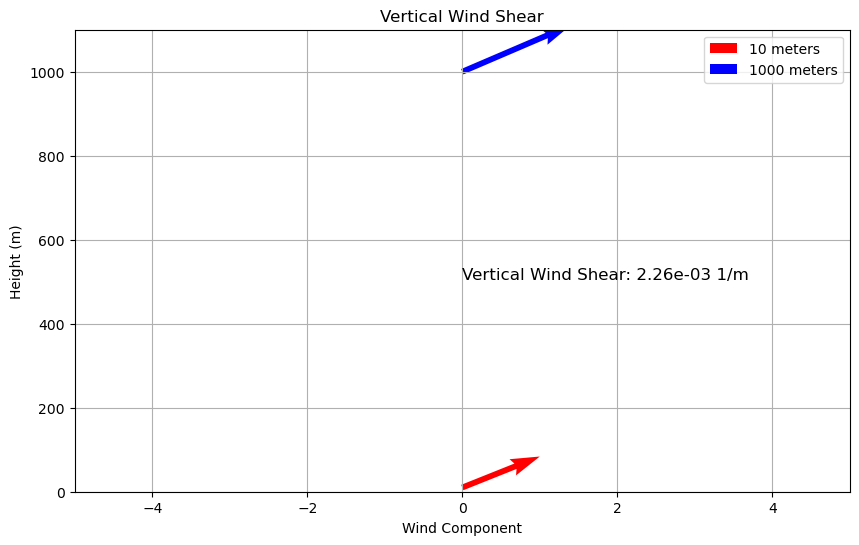

In [19]:


# Example data (replace with your actual U, V components at different heights)
U_10m, V_10m = 5, 2   # Wind components at 10 meters
U_1000m, V_1000m = 7, 3  # Wind components at 1000 meters
height_10m, height_1000m = 10, 1000  # Heights in meters

# Calculate vertical wind shear
delta_U = U_1000m - U_10m
delta_V = V_1000m - V_10m
delta_z = height_1000m - height_10m
vertical_wind_shear = np.sqrt((delta_U / delta_z)**2 + (delta_V / delta_z)**2)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
ax.quiver([0], [height_10m], [U_10m], [V_10m], color='r', scale=50, label='10 meters')
ax.quiver([0], [height_1000m], [U_1000m], [V_1000m], color='b', scale=50, label='1000 meters')
ax.annotate(f'Vertical Wind Shear: {vertical_wind_shear:.2e} 1/m', xy=(0, 0.5*(height_10m + height_1000m)), fontsize=12)

# Formatting plot
ax.set_xlim(-5, 5)
ax.set_ylim(0, 1100)
ax.set_xlabel('Wind Component')
ax.set_ylabel('Height (m)')
ax.legend()
ax.grid()
ax.set_title('Vertical Wind Shear')
plt.show()


In [20]:
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates

# # Extract high impact days
# high_impact = pre_daily.where(pre_daily >= pre_daily_thres, drop=True)

# # Plotting the high impact days
# plt.figure(figsize=(12, 6))
# plt.bar(high_impact['time'].values, high_impact, label='Daily Precipitation')

# # Adding the threshold line
# plt.axhline(pre_daily_thres, color='r', linestyle='--', label=f'Threshold {pre_daily_thres.values:.2f} mm')

# # Formatting x-axis to show only the dates of high impact days
# plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# plt.xticks(rotation=45, ha='right')

# plt.legend(loc='upper right', fontsize=8)
# plt.xlabel("Days")
# plt.ylabel("Precipitation (mm)")
# plt.title("High Impact Rainfall Days")
# plt.tight_layout()  # Adjust layout to ensure everything fits without overlapping
# plt.grid(True)
# plt.show()



# WIND SHEAR

# OPENING THE DATASET

In [21]:
data= xr.open_dataset('data.nc')


# SELECTING ACCRA

In [22]:
data = data.sel(latitude=5.6, longitude=0.17, method='nearest')


In [23]:
# Ensure the time coordinate is unique and sorted
data = data.sel(time=~data.get_index("time").duplicated())
data = data.sortby('time')

# EXTRACTION AND DEFINING CERTAIN VARIABLES

In [24]:
# Define the dates for the day before, the day of, and the day after the heavy precipitation
day_before = '2015-07-02'
day_of = '2015-07-03'
day_after = '2015-07-04'

# Extract the time range for the selected dates
time_before = data.sel(time=slice(day_before + 'T00:00:00', day_before + 'T23:00:00'))
time_of = data.sel(time=slice(day_of + 'T00:00:00', day_of + 'T23:00:00'))
time_after = data.sel(time=slice(day_after + 'T00:00:00', day_after + 'T23:00:00'))

# Combine all the time ranges
time_range = xr.concat([time_before, time_of, time_after], dim='time')

# Extract u and v components
u = time_range['u']
v = time_range['v']

# Define the pressure levels (e.g., 850 hPa and 500 hPa)
pressure_level_1 = 850
pressure_level_2 = 200


# FUNCTION TO CALCULATE THE WIND SHEAR

In [25]:
# Calculate wind shear magnitude
def calculate_wind_shear(u, v, p1, p2):
    u1 = u.sel(level=p1, method='nearest')
    v1 = v.sel(level=p1, method='nearest')
    u2 = u.sel(level=p2, method='nearest')
    v2 = v.sel(level=p2, method='nearest')
    shear_magnitude = np.sqrt((u2 - u1)**2 + (v2 - v1)**2)
    return shear_magnitude

# Calculate wind shear for each time step
wind_shear = calculate_wind_shear(u, v, pressure_level_1, pressure_level_2)

# PLOTTING THE COMPUTED WIND SHEAR VALUES

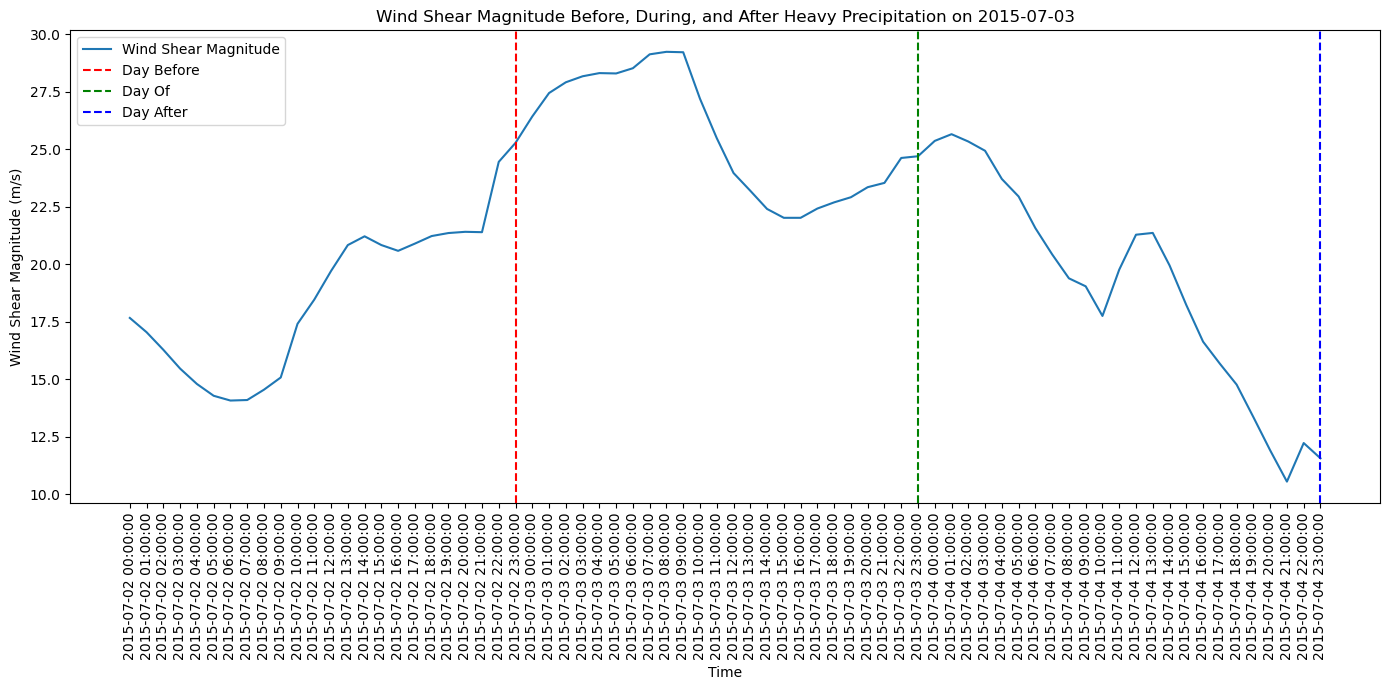

In [26]:


# Plotting
plt.figure(figsize=(14, 7))

# Convert time to a more readable format
time_hours = [pd.to_datetime(str(time.values)).strftime('%Y-%m-%d %H:%M:%S') for time in wind_shear.time]

plt.plot(time_hours, wind_shear, label='Wind Shear Magnitude')

# Adding vertical lines to separate days
plt.axvline(x=pd.to_datetime(day_before + 'T23:00:00').strftime('%Y-%m-%d %H:%M:%S'), color='r', linestyle='--', label='Day Before')
plt.axvline(x=pd.to_datetime(day_of + 'T23:00:00').strftime('%Y-%m-%d %H:%M:%S'), color='g', linestyle='--', label='Day Of')
plt.axvline(x=pd.to_datetime(day_after + 'T23:00:00').strftime('%Y-%m-%d %H:%M:%S'), color='b', linestyle='--', label='Day After')

plt.xlabel('Time')
plt.ylabel('Wind Shear Magnitude (m/s)')
plt.title(f'Wind Shear Magnitude Before, During, and After Heavy Precipitation on {day_of}')
plt.xticks(rotation=90)
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()
#plt.savefig('wind_shear.svg',bbox_inches='tight',dpi=1200)

# TEPHIGRAM

# SELECTING TEMPERATURE AND HUMIDITY AND DATES

In [39]:
t_r = data[['t','r']]

day_before = t_r.sel(time='2015-07-02')
day_of = t_r.sel(time='2015-07-03')
day_after = t_r.sel(time='2015-07-04')

# FUNCTION TO CALCULATE THE DEW POINT TEMPERATURE

In [40]:
def calculate_dew_point(t, r):
    temp = t - 273.15
    dew_p = temp - ((100 - r)/5)
    return dew_p



In [41]:
dew_point_before = calculate_dew_point(day_before['t'], day_before['r'])
dew_point_during = calculate_dew_point(day_of['t'], day_of['r'])
dew_point_after = calculate_dew_point(day_after['t'], day_after['r'])

# GROUPYING BY AND INVERTING THE LEVELS THEREBY INVERTING THE DEW-POINT TEMPERATURE

In [42]:
dew_point_before_level = dew_point_before.groupby('level').mean(dim='time').sortby('level', ascending=False)
dew_point_during_level = dew_point_during.groupby('level').mean(dim='time').sortby('level', ascending=False)
dew_point_after_level = dew_point_after.groupby('level').mean(dim='time').sortby('level', ascending=False)

# ISOLATING THE PRESSURE LEVELS

In [43]:
level = t_r['level'].sortby('level',ascending=False)
level

<xarray.DataArray 'level' (level: 12)>
array([1000,  950,  900,  850,  800,  750,  650,  550,  450,  350,  250,  200])
Coordinates:
    longitude  float32 0.25
    latitude   float32 5.5
  * level      (level) int32 1000 950 900 850 800 750 650 550 450 350 250 200
Attributes:
    units:      millibars
    long_name:  pressure_level

# FUNCTION TO CONVERT TEMPERATURE TO CELSIUS SCALE

In [44]:
def convert_temp(t):
    temp = t - 273.15
    return temp

temp_before = convert_temp(day_before['t'])
temp_during = convert_temp(day_of['t'])
temp_after = convert_temp(day_after['t'])


# GROUPYING BY AND INVERTING THE LEVELS THEREBY INVERTING THE TEMPERATURE VALUES

In [45]:
temp_before_level = temp_before.groupby('level').mean(dim='time').sortby('level', ascending=False)
temp_during_level = temp_during.groupby('level').mean(dim='time').sortby('level', ascending=False)
temp_after_level = temp_after.groupby('level').mean(dim='time').sortby('level', ascending=False)

# GROUPYING BY AND INVERTING THE LEVELS THEREBY INVERTING THE RH

In [46]:
rh_before_level = day_before['r'].groupby('level').mean(dim='time').sortby('level', ascending=False)
rh_during_level = day_of['r'].groupby('level').mean(dim='time').sortby('level', ascending=False)
rh_after_level = day_after['r'].groupby('level').mean(dim='time').sortby('level', ascending=False)

# COMPUTING THE GEOMETRIC HEIGHT FROM THE GEOPOTENTIAL HEIGHT

In [47]:
geometric_height = data['z']/9.8
#geometric_height = geometric_height - np.mean(geometric_height)
geometric_height_level = geometric_height.groupby('level').mean(dim='time').sortby('level',ascending=False)
geometric_height_level

<xarray.DataArray 'z' (level: 12)>
array([  111.67009,   560.9394 ,  1030.6052 ,  1522.9258 ,  2040.2031 ,
        2585.4226 ,  3774.0127 ,  5124.5464 ,  6699.7935 ,  8593.647  ,
       10971.612  , 12448.346  ], dtype=float32)
Coordinates:
    longitude  float32 0.25
    latitude   float32 5.5
  * level      (level) int32 1000 950 900 850 800 750 650 550 450 350 250 200

# CREATING A DATAFRAME OF THE BEFORE, DURING AND AFTER PRECIPITATION

In [48]:
before_data = {
    'PRES': level,
    'HGHT': geometric_height_level,
    "TEMP": temp_before_level,
    "DWPT":dew_point_before_level,
    "RELH": rh_before_level,
}


during_data = {
    'PRES': level,
    'HGHT': geometric_height_level,
    "TEMP": temp_during_level,
    "DWPT":dew_point_during_level,
    "RELH": rh_during_level,
}


after_data = {
    'PRES': level,
    'HGHT': geometric_height_level,
    "TEMP": temp_after_level,
    "DWPT":dew_point_after_level,
    "RELH": rh_after_level,
}


before_data = pd.DataFrame(before_data)
during_data = pd.DataFrame(during_data)
after_data = pd.DataFrame(after_data)

# MAKING A TEPHIGRAM SUBPLOT OF THE DATA 

In [49]:


# Before the heavy precipitation
p_before = before_data['PRES'].astype(float)
z_before = before_data['HGHT'].astype(float)
t_before = before_data['TEMP'].astype(float)
td_before = before_data['DWPT'].astype(float)


# During the heavy precipitation
p_during = during_data['PRES'].astype(float)
z_during = during_data['HGHT'].astype(float)
t_during = during_data['TEMP'].astype(float)
td_during = during_data['DWPT'].astype(float)


# After the heavy precipitation
p_after = after_data['PRES'].astype(float)
z_after = after_data['HGHT'].astype(float)
t_after = after_data['TEMP'].astype(float)
td_after = after_data['DWPT'].astype(float)

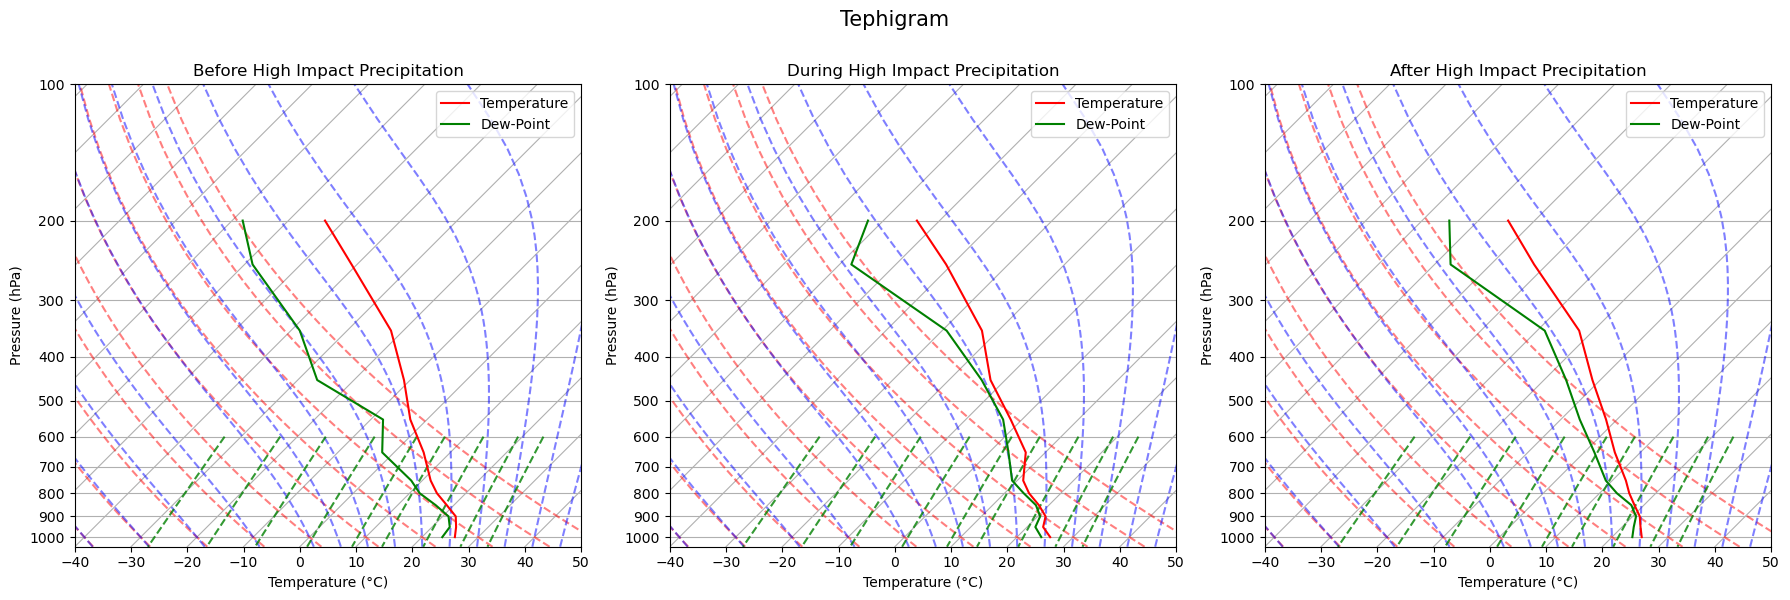

In [64]:

# Create the figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.clear()
# Define a function to create a tephigram
def create_tephigram(ax, p, t, td, z, title):
    teph = SkewT(fig, rotation=45, subplot=(1, 3, ax))
    teph.plot(p, t, 'r', label='Temperature')
    teph.plot(p, td, 'g', label='Dew-Point')
    teph.plot_dry_adiabats()
    teph.plot_moist_adiabats()
    teph.plot_mixing_lines()

    # Add axis labels and a title to the tephigram
    teph.ax.set_xlabel('Temperature (°C)', fontsize=10)
    teph.ax.set_ylabel('Pressure (hPa)', fontsize=10)
    teph.ax.set_title(title, fontsize=12)
    teph.ax.legend()
    

# Create tephigrams for each dataset
create_tephigram(ax=1, p=p_before, t=t_before, td=td_before, z=z_before, title='Before High Impact Precipitation')
create_tephigram(ax=2, p=p_during, t=t_during, td=td_during, z=z_during, title='During High Impact Precipitation')
create_tephigram(ax=3, p=p_after, t=t_after, td=td_after, z=z_after, title='After High Impact Precipitation')

plt.suptitle('Tephigram', fontsize=15)
#plt.legend()
# Show the plot
plt.tight_layout()
plt.savefig("tephigram.svg", bbox_inches='tight', dpi=1200)


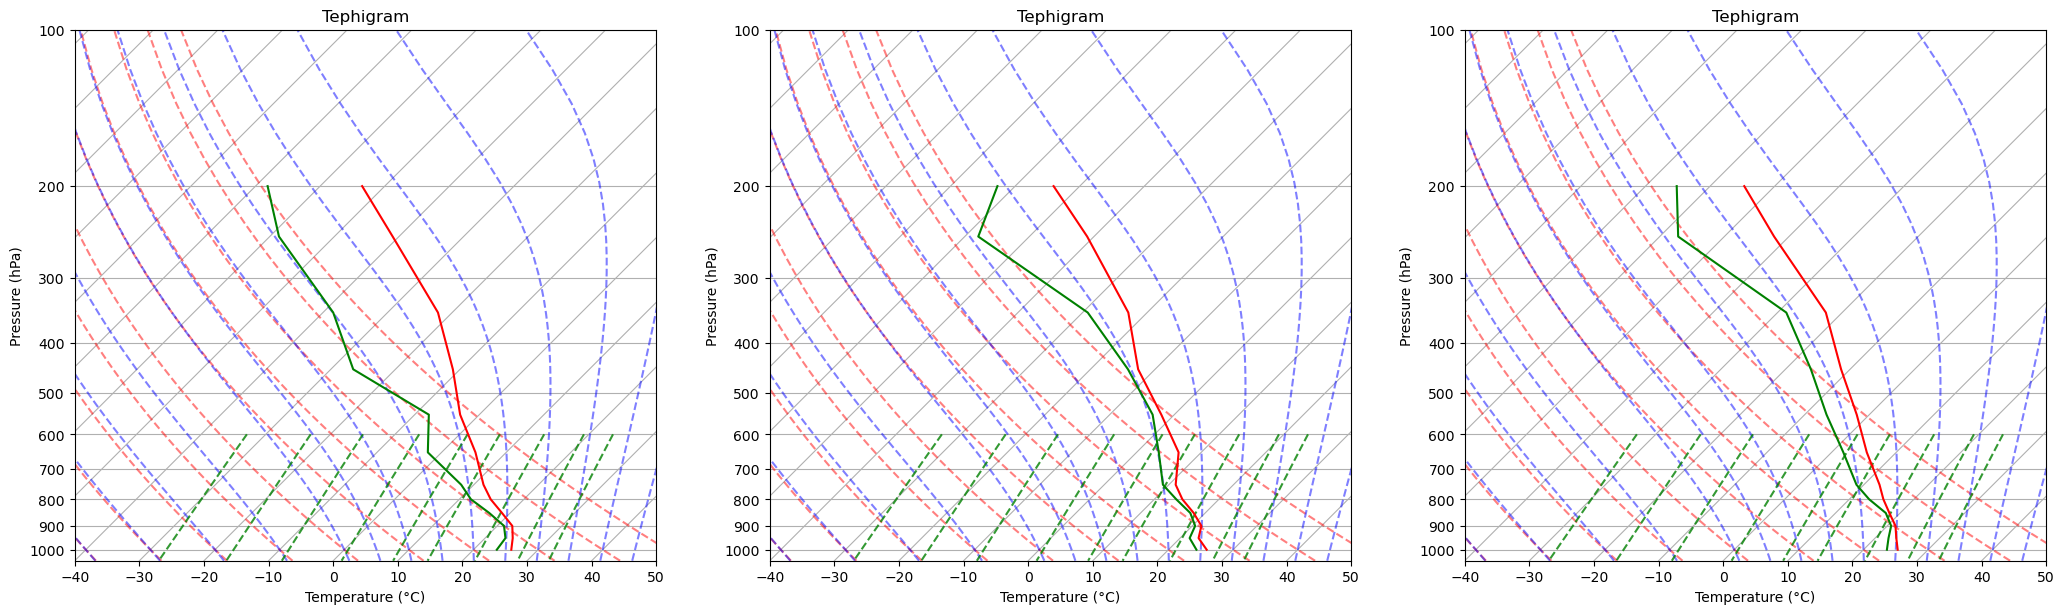

In [55]:


# Create the figure and subplots
fig, ax = plt.subplots(1, 3, figsize=(21, 6))
fig.clear()
# Create a tephigram on the first subplot
teph_before = SkewT(fig, rotation=45, subplot=(1, 3, 1))  # Here, (1, 3, 1) means 1 row, 3 columns, and first subplot
teph_before.plot(p_before, t_before, 'r')
teph_before.plot(p_before, td_before, 'g')
teph_before.plot_dry_adiabats()
teph_before.plot_moist_adiabats()
teph_before.plot_mixing_lines()

# Add axis labels and a title to the tephigram
teph_before.ax.set_xlabel('Temperature (°C)')
teph_before.ax.set_ylabel('Pressure (hPa)')
teph_before.ax.set_title('Tephigram')


teph_during = SkewT(fig, rotation=45, subplot=(1, 3, 2))  # Here, (1, 3, 1) means 1 row, 3 columns, and first subplot
teph_during.plot(p_during, t_during, 'r')
teph_during.plot(p_during, td_during, 'g')
teph_during.plot_dry_adiabats()
teph_during.plot_moist_adiabats()
teph_during.plot_mixing_lines()

# Add axis labels and a title to the tephigram
teph_during.ax.set_xlabel('Temperature (°C)')
teph_during.ax.set_ylabel('Pressure (hPa)')
teph_during.ax.set_title('Tephigram')


teph_after = SkewT(fig, rotation=45, subplot=(1, 3, 3))  # Here, (1, 3, 1) means 1 row, 3 columns, and first subplot
teph_after.plot(p_after, t_after, 'r')
teph_after.plot(p_after, td_after, 'g')
teph_after.plot_dry_adiabats()
teph_after.plot_moist_adiabats()
teph_after.plot_mixing_lines()

# Add axis labels and a title to the tephigram
teph_after.ax.set_xlabel('Temperature (°C)')
teph_after.ax.set_ylabel('Pressure (hPa)')
teph_after.ax.set_title('Tephigram')


# # Create a twin axis for height on the right
# ax_right = teph_after.ax.twinx()
# ax_right.set_ylim(teph_after.ax.get_ylim())
# ax_right.set_yticks(teph_after.ax.get_yticks())
# ax_right.set_yticklabels(z_after)
# ax_right.set_ylabel('Height (m)')


# Show the plot
plt.tight_layout()
plt.show()

In [213]:
import pandas as pd

# Data
data = {
    'YEARS': [1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010],
    'SAHEL_SP13': [20, 17, 8, 14, 30, 19, 13, 8, 20, 17, 16, 22, 23, 17, 14, 17, 14, 14, 23, 21, 31, 20, 22, 24, 27, 25, 25, 19, 19, 23],
    'SAHEL_SPI1': [26, 21, 12, 14, 27, 20, 19, 12, 21, 20, 16, 22, 22, 19, 18, 19, 16, 18, 25, 22, 28, 22, 24, 25, 25, 24, 23, 20, 23, 24],
    'SAHEL_SAI': [17, 14, 6, 10, 19, 14, 10, 6, 13, 12, 11, 15, 15, 12, 12, 12, 10, 12, 17, 15, 20, 13, 15, 17, 18, 16, 17, 13, 14, 16],
    'SAHEL_RAI': [18, 14, 7, 10, 20, 14, 11, 7, 13, 13, 12, 15, 16, 12, 13, 13, 10, 13, 18, 15, 21, 14, 15, 18, 18, 17, 18, 13, 15, 17],
    'SAVANNAH_SP13': [17, 14, 10, 12, 20, 14, 17, 12, 16, 15, 13, 13, 15, 17, 13, 15, 15, 15, 16, 15, 19, 19, 18, 20, 20, 21, 18, 15, 13, 17],
    'SAVANNAH_SPI1': [27, 25, 20, 20, 27, 22, 24, 17, 24, 22, 23, 21, 24, 24, 21, 22, 21, 22, 25, 22, 24, 27, 23, 26, 26, 25, 23, 24, 24, 24],
    'SAVANNAH_SAI': [23, 21, 17, 18, 24, 19, 22, 15, 21, 19, 20, 19, 22, 21, 19, 19, 19, 19, 22, 19, 21, 24, 21, 23, 23, 23, 21, 21, 21, 21],
    'SAVANNAH_RAI': [22, 20, 16, 17, 22, 18, 20, 14, 20, 18, 19, 18, 20, 20, 18, 18, 17, 18, 20, 18, 20, 23, 20, 22, 22, 21, 20, 20, 20, 20],
    'GUINEA-COAST_SP13': [24, 14, 23, 25, 31, 24, 17, 20, 13, 22, 24, 21, 24, 22, 21, 31, 24, 18, 30, 25, 17, 23, 27, 33, 18, 27, 25, 23, 13, 18],
    'GUINEA-COAST_SPI1': [24, 17, 22, 25, 29, 27, 19, 22, 18, 22, 26, 23, 26, 22, 22, 30, 26, 21, 29, 24, 19, 24, 26, 32, 20, 27, 23, 25, 17, 20],
    'GUINEA-COAST_SAI': [20, 15, 20, 22, 25, 22, 17, 19, 16, 19, 22, 19, 21, 19, 19, 27, 23, 19, 25, 21, 17, 22, 22, 29, 18, 23, 20, 21, 15, 17],
    'GUINEA-COAST_RAI': [20, 14, 20, 21, 25, 22, 16, 19, 15, 19, 21, 19, 21, 19, 19, 25, 23, 18, 24, 20, 17, 22, 22, 28, 17, 23, 20, 21, 14, 16]
}


df = pd.DataFrame(data)


df.set_index('YEARS', inplace=True)





In [241]:
tick = [a.split('_')[1] for a in df.columns]
tick

['SP13',
 'SPI1',
 'SAI',
 'RAI',
 'SP13',
 'SPI1',
 'SAI',
 'RAI',
 'SP13',
 'SPI1',
 'SAI',
 'RAI']

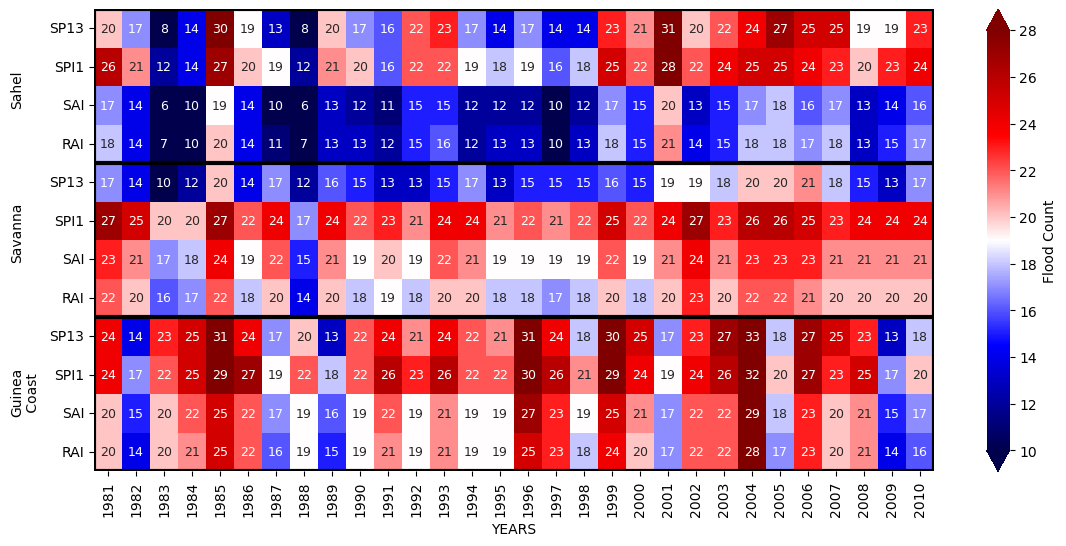

In [333]:
fig, ax1 = plt.subplots(figsize=(15,6))
plt.subplots_adjust(left=0.2)
sns.heatmap(df.T,cmap="seismic", annot=True,annot_kws={'fontsize':9}, ax=ax1, vmax=28, vmin=10, cbar_kws={'extend':'both', 'label':'Flood Count'})
tick = [a.split('_')[1] for a in df.columns]
ax1.set_yticks(np.arange(len(tick))+0.5, tick)
#ax1.set_yticklabels(tick)
plt.axvline(0, color='k', lw=3)
plt.axvline(30, color='k', lw=3)
plt.axhline(0, color='k', lw=3)
plt.axhline(4, color='k', lw=3)
plt.axhline(8, color='k', lw=3)
plt.axhline(12, color='k', lw=3)

labels = ['Guinea\n Coast', 'Savanna', 'Sahel'][::-1]
ys = [2.5, 6.5, 10.5]
[plt.text(-3., ys[i], j, rotation=90) for i,j in enumerate(labels)]
plt.savefig('heatmap.svg',bbox_inches='tight',dpi=1200)



In [18]:
# Function to calculate the number of hours in each month
def hours_in_month(year, month):
    if month == 12:
        next_month = datetime(year + 1, 1, 1)
    else:
        next_month = datetime(year, month + 1, 1)
    current_month = datetime(year, month, 1)
    delta = next_month - current_month
    return delta.days * 24

# Directory containing the NetCDF files
directory = "C:\\Users\\DELL\\Desktop\\ms-projects\\Identification of High Impact  Rainfall\\data"
file_path = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.nc4')]

# Open the dataset with decode_times=False
ds = xr.open_mfdataset(file_path, decode_times=False, combine='nested', concat_dim='time', chunks={})

# Manually decode the time using cftime
time_var = ds['time']
times = cftime.num2date(time_var.values, time_var.units, calendar=time_var.attrs.get('calendar', 'standard'))
times = pd.to_datetime([t.strftime('%Y-%m-%d %H:%M:%S') for t in times])

# Assign the converted times back to the dataset
ds['time'] = ('time', times)

# Calculate total monthly precipitation
precipitation = ds['precipitation'].copy()

# Loop over each time step to multiply by the number of hours in each month
for t in range(len(ds['time'])):
    date = pd.Timestamp(ds['time'].values[t])
    year = date.year
    month = date.month
    hours = hours_in_month(year, month)
    precipitation[t, :, :] *= hours

# Update the precipitation data and units in the dataset
ds['precipitation'] = precipitation
ds['precipitation'].attrs['units'] = 'mm'

# Filter the dataset for the time period from 2010 to 2023
ds_filtered = ds.sel(time=slice('2010-01-01', '2023-12-31'))

# Save the processed data to a new NetCDF file
output_filename = 'combined_daa.nc'
ds_filtered.to_netcdf(output_filename)

print(f"Processed data has been saved to {output_filename}")

Processed data has been saved to combined_daa.nc
